In [93]:
import copy
import random as rnd
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
plt.rcParams['figure.figsize'] = [10, 5] # this makes a nicer figure size, you can play around with the numbers

# A model of immune and cancer cell populations

We have three types of cells that we want to model
- Type 1 T-cells, which can recognise cancer cells, and start an immune reaction and kill cancer cells
- Type 2 T-cells, which cannot recognise cancer cells
- Cancer cells


The interactions between them
- A T-cell (type 1 or type 2) divides to make one extra cell of the same type
- A T-cell (type 1 or type 2) dies
- A cancer cell divides to make one extra cancer cell
- A T-cell (of type 1) kills a cancer cell

Therefore we have four parameters
- Division rate of T-cells (we assume it is the same for type 1 and 2)
- Death rate of T-cells (same for type 1 and 2)
- Division rate of cancer cells
- Rate of cancer cell killing by type 1 T-cells

In [176]:
def model_cancerTcell(pop, params):
    dT1 = params[0]*pop[0] - params[1]*pop[0] # type 1 T-cell divides minus it dies
    dT2 = params[0]*pop[1] - params[1]*pop[1] # type 2 T-cell divides minus it dies
    dC = params[2]*pop[2] - params[3]*pop[0]*pop[2] # cancer cell divides or gets killed by T-cell
    return(np.array([dT1, dT2, dC]))

## Simulating the model numerically

We will use numerical simulation to estimate how the population of each of the cell types changes over time. We will use the simplest method of solving differential equations, where we always take steps of **dt** time ahead and constantly update the population.

### First, take a few simulation steps separately

In [177]:
# Define the starting point (typically time=0) and parameters
t = 0
starting_population = np.array([100, 100, 20])

parameters = [0.5, 0.45, 1, 0.1]
dt = 0.01 # simulation parameter of how big time-steps we are taking

In [178]:
# First, take a single step of the simulation: compute the change in cell numbers in dt and update the population

delta_population = model_cancerTcell(starting_population, parameters) * dt
print('Change in population after dt:',delta_population)
population = starting_population + delta_population
print('New numbers of cells of each type:', population)

Change in population after dt: [ 0.05  0.05 -1.8 ]
New numbers of cells of each type: [100.05 100.05  18.2 ]


In [179]:
# Now, let's take two steps, note that in the second step, we use the previously updated population values
delta_population = model_cancerTcell(starting_population, parameters) * dt
next_population = starting_population + delta_population

delta_population = model_cancerTcell(next_population, parameters) * dt
population = next_population + delta_population
print('New population after two steps:', population)


New population after two steps: [100.100025 100.100025  16.56109 ]


In [180]:
# We can compare this to taking "two steps in one", as if dt was twice the size
delta_population = model_cancerTcell(starting_population, parameters) * 2*dt
population = starting_population + delta_population
print('New population after one larger step:', population)

New population after one larger step: [100.1 100.1  16.4]


The difference is not huge, but there is some - the version with the smaller time-step is closer to the real solution that we expect to see.

### Now, let's run this for many steps

In [246]:
# Define the starting point (typically time=0) and parameters
t = 0
starting_population = np.array([100, 100, 20])

parameters = [0.5, 0.5, 2, 0.01]
dt = 0.01 # simulation parameter of how big time-steps we are taking
tMax = 2 # maximum time until which we want to simulate

In [247]:
time = np.arange(t, tMax, dt) # all the time-values we are evaluating, from 0 to tMax, by steps of dt
population = starting_population
pop_over_time = np.array(population)

for i in range(len(time)-1):
    delta_population = model_cancerTcell(population, parameters) * dt
    population = population + delta_population
    pop_over_time = np.vstack((pop_over_time, population))

Number of cells at time  2  is: [100.         100.         144.87164063]


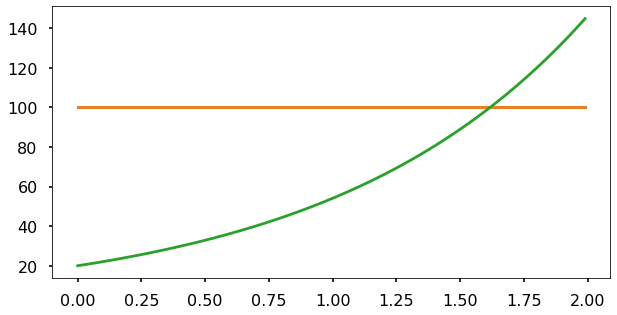

In [248]:
# Plot the number of cells in each cell type over time: time is on the x axis and number of cells is on the y
plt.plot(time, pop_over_time)

# And print the number of each cell type at the final time-point
print('Number of cells at time ',tMax, ' is:', pop_over_time[-1,:])

There seems to be only two lines... That is because type 1 and type 2 T-cells have the exact same numbers throughout the simulation, so their lines overlap. If we change the initial number of cells for one of these (in starting_population), there will be three distinct lines.

- How does the result change with **dt**? The lines might look similar, but are the final values the same?
- How does it change if we change parameters? For example the rate of cancer cell divisions or the rate of T-cell division or killing?

# Update to the model

In an update to the model, let's include a further interaction: T-cells that recognise cancer cells (type 1 T-cells) divide more if they are in the presence of cancer cells
- The rate of division of type 1 T-cells depends not only on the population of T-cells (pop0) but, also on the population of cancer cells (pop2)
- This updated reaction now has a new parameter, which is *not* the same as the parameter for type 2 T-cell division - this distinguishes type 1 and type 2 T-cells
- Overall now we have 5 parameters: type 1 T-cell division rate induced by cancer cells, type 2 T-cell division rate, T-cell death rate (still shared by both T-cells), cancer cell division rate and cancer cell killing rate

In [208]:
def model_cancerTcell_plusInduction(pop, params):
    # Fill in the gaps to define the model
    dT1 = #... : # type 1 T-cell divides (induced by cancer cells) minus it dies
    dT2 = #... : # type 2 T-cell divides minus it dies
    dC =  #... : # cancer cell divides or gets killed by T-cell
    return(np.array([dT1, dT2, dC]))

Once the model is defined, let's choose some starting values and parameter values (similar to the previous model) and simulate the model similarly to how we did with the previous version

In [261]:
t = 0
starting_population = np.array([100, 100, 50])

parameters = [0.005, 0.5, 0.5, 2, 0.01] # the first parameter is the induction of T-cell division by cancer cells
dt = 0.01 # simulation parameter of how big time-steps we are taking
tMax = 2 # maximum time until which we want to simulate

In [262]:
# Write here the code for simulating the model (very similar to what we used above)

Number of cells at time  2  is: [179.37453348 100.         309.00302812]


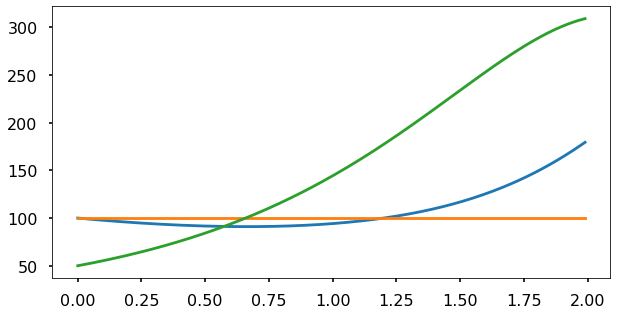

In [263]:
# Plot the number of cells in each cell type over time: time is on the x axis and number of cells is on the y
plt.plot(time, pop_over_time)

# And print the number of each cell type at the final time-point
print('Number of cells at time ',tMax, ' is:', pop_over_time[-1,:])

- There seems to be a change in the curves around the end, so how does it look if we simulate for longer?
- How does it change if we change parameters, especially the one defining how T-cells kill cancer cells?